Allowed Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

Write a function called sample that performs equidistant sampling on a function f. The function has the following inputs and outputs:

Inputs
* f is the function being sampled.
* T is the end of the sampling window.
* v_s is the sampling frequency.


Outputs
* t is the vector of sampling time steps.
* x is the vector of samples.

In [3]:
def sample(f, T, v_s):
  n = T * v_s
  t = np.linspace(0, T, n)
  x = f(t)
  return t, x

Consider f(t) = 0.8sin(2π * (3t - 1/6)) + 0.3sin(2π * 5t)

Sample the signal f up to T = 3 with at sampling rate vs = 50Hz

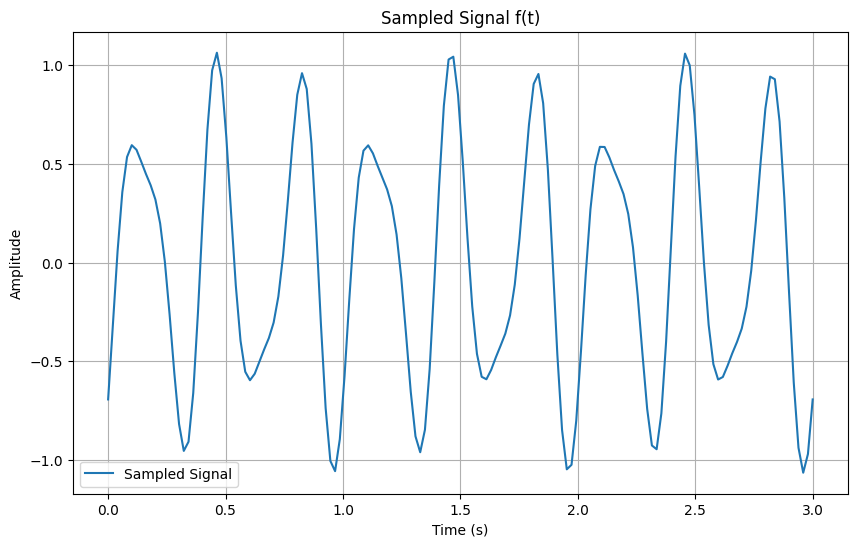

In [4]:
def f(t):
    return 0.8 * np.sin(2 * np.pi * (3 * t - 1 / 6)) + 0.3 * np.sin(2 * np.pi * 5 * t)
# Sample the signal with the given parameters
T = 3  # End of the sampling window
v_s = 50  # Sampling frequency in Hz

t, x = sample(f, T, v_s)

# Plot the sampled signal
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal f(t)')
plt.grid(True)
plt.legend()
plt.show()

Write a function called dft that calculates the Discrete Fourier Transform of a discrete signal x. The outputs of the function are two variables a_values and b_values corresponding to the Fourier coefficients a_k and b_k.

Incorporate Nyquist's sampling theorem into your algorithm.

In [5]:
import numpy as np

def dft(x):
    N = len(x)  # Length of the input signal
    a_values = []  # List to store the cosine coefficients
    b_values = []  # List to store the sine coefficients

    for k in range(N // 2 + 1):  # Up to Nyquist frequency
        a_k = 0
        b_k = 0
        for n in range(N):
            a_k += x[n] * np.cos(2 * np.pi * k * n / N)
            b_k -= x[n] * np.sin(2 * np.pi * k * n / N)

        a_values.append(a_k / N)  # Normalize coefficients
        b_values.append(b_k / N)

    return a_values, b_values


Use the dft function to compute the frequency spectrum of the following functions for the given period at 16Hz and 50Hz:
- f(t) = sin(10πt) + sin(16πt); T = 1
- f(t) = sin(10πt)\(2+sin(4πt)); T=1
- f(t) = (t + 1)  mod 2 - 1; T = 2
- f(t) = ((t + 1)  mod 2); T = 2


Hint: use your previously implemented function sample

In [6]:
def f1(t):
    return np.sin(10 * np.pi * t) + np.sin(16 * np.pi * t)

def f2(t):
    return np.sin(10 * np.pi * t) * (2 + np.sin(4 * np.pi * t))

def f3(t):
    return (t + 1) % 2 - 1

def f4(t):
    return (t + 1) % 2

sampling_rates = [16, 50]
T_values = [1, 1, 2, 2]
functions = [f1, f2, f3, f4]

results = {}


Write a function called plot_magnitude_spectrum which plots the magnitude of the Fourier components as given by a_values and b values

Thus, the x-axis of the plot will be the frequency spectrum and the y-axis will be the corresponding magnitudes

The inputs of the function are:
a values representing the Fourier coefficients ak b_values representing the Fourier coefficients b
v_s representing the sampling frequency
The function has no outputs

In [7]:
def plot_magnitude_spectrum(a_values, b_values, v_s):
    N = (len(a_values) - 1) * 2
    magnitude_spectrum = np.sqrt(np.array(a_values[:len(b_values)])**2 + np.array(b_values)**2)
    frequency_values = np.arange(len(magnitude_spectrum)) * v_s / N

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 6))
    plt.stem(frequency_values, magnitude_spectrum, basefmt=" ", use_line_collection=True)
    plt.title('Magnitude Spectrum of Fourier Components')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()


Plot the four functions on the previous slide (at both frequencies) and explain (in words) the connection between the function and the obtained frequency spectrum





<ipython-input-8-a65bca304cd0>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequency_values, magnitude_spectrum, basefmt=" ", use_line_collection=True)


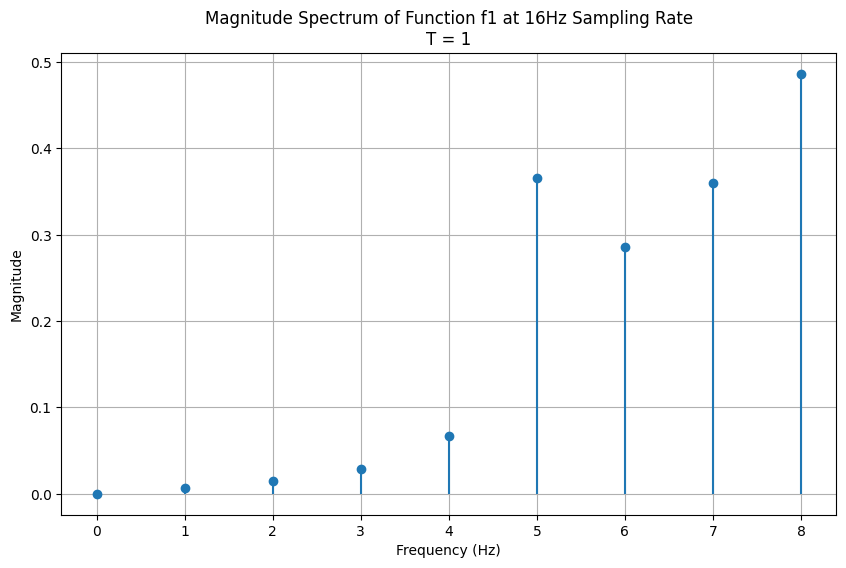

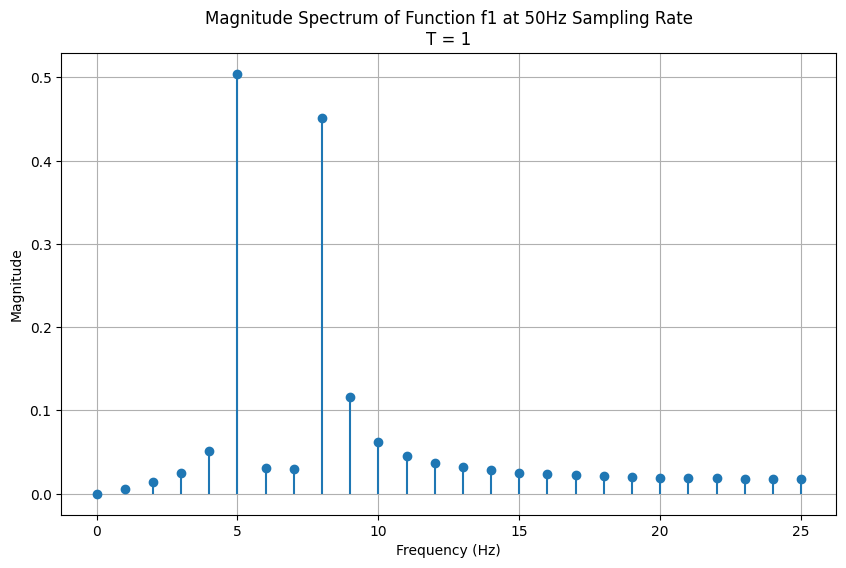

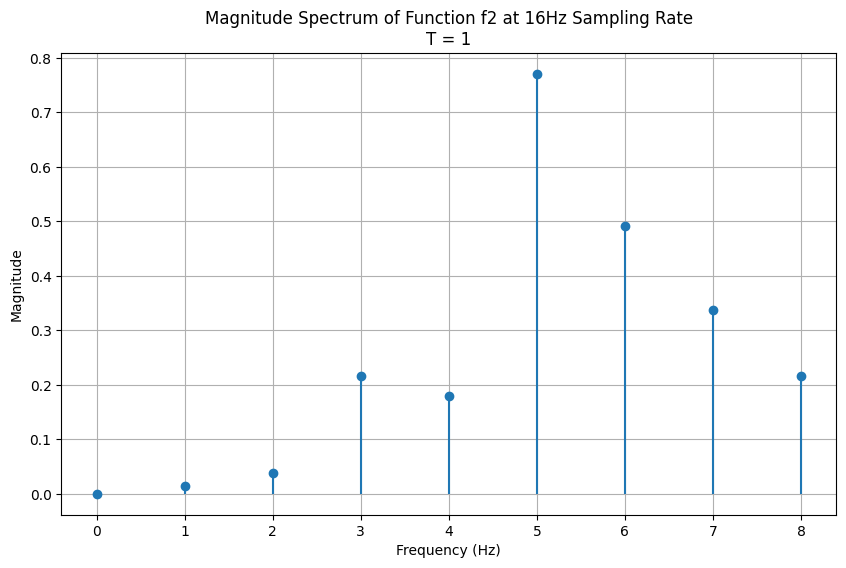

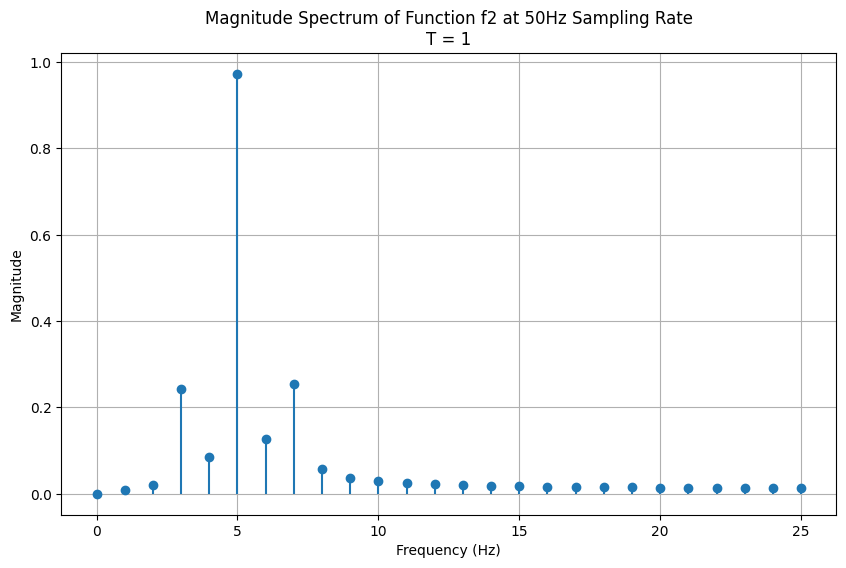

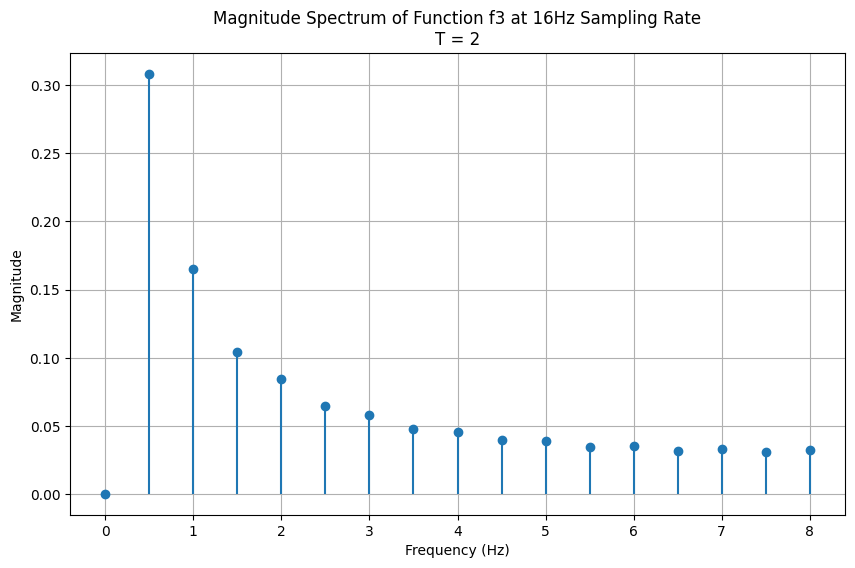

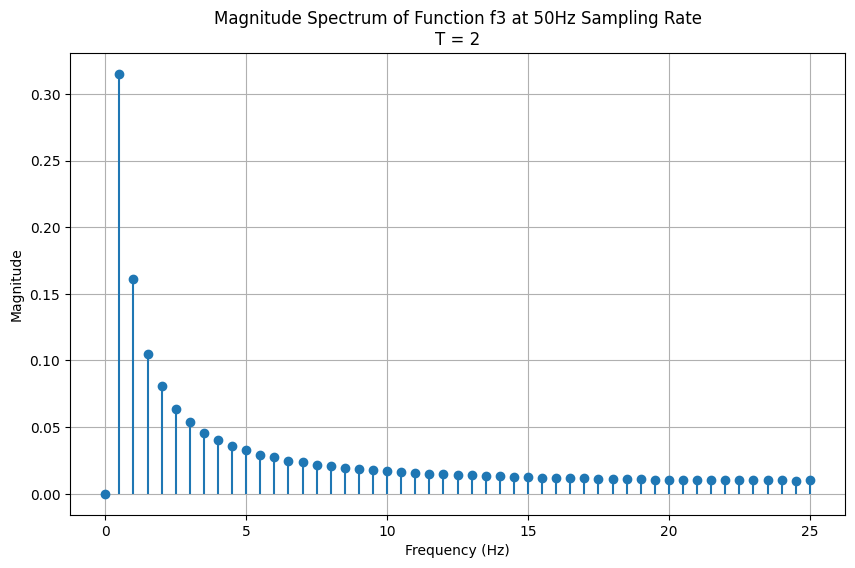

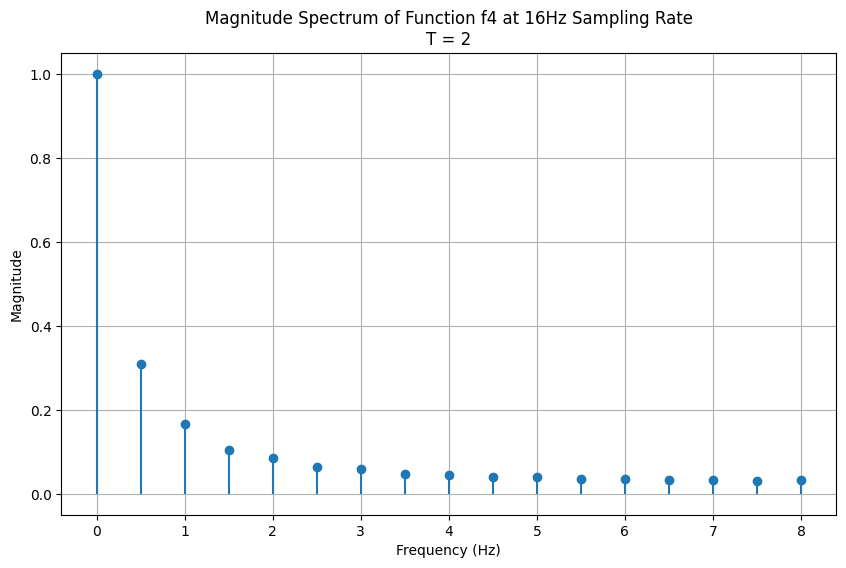

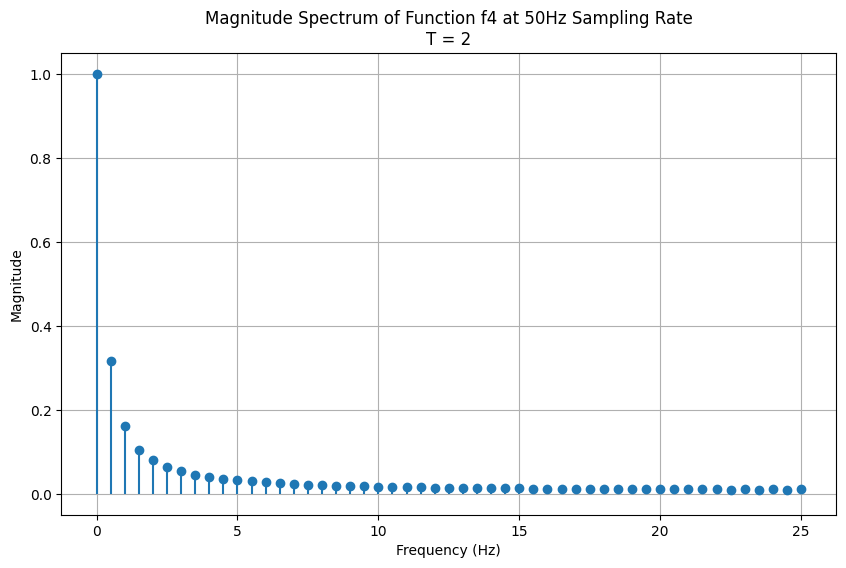

In [8]:
def plot_magnitude_spectrum_with_title(a_values, b_values, v_s, func_name, T):
    N = (len(a_values) - 1) * 2
    magnitude_spectrum = np.sqrt(np.array(a_values[:len(b_values)])**2 + np.array(b_values)**2)
    frequency_values = np.arange(len(magnitude_spectrum)) * v_s / N

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 6))
    plt.stem(frequency_values, magnitude_spectrum, basefmt=" ", use_line_collection=True)
    plt.title(f'Magnitude Spectrum of Function {func_name} at {v_s}Hz Sampling Rate\nT = {T}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Running the loop to plot the magnitude spectra
for i, func in enumerate(functions):
    T = T_values[i]
    for v_s in sampling_rates:
        t, x = sample(func, T, v_s)
        a_values, b_values = dft(x)
        plot_magnitude_spectrum_with_title(a_values, b_values, v_s, func.__name__, T)


Write a function called idft that performs the inverse DFT using the Fourier coefficients a and b obtained earlier.
The function has three inputs:

* a_values representing the Fourier coefficients a_k
* b_values representing the Fourier coefficients b_k
* N representing the number of samples in the reconstructed signal

The function has one output x_reconstructed which is the
reconstructed signal given a_k and b_k

In [9]:
def idft(a_values, b_values, N):
    a_values = np.array(a_values) # Again turn into numpy array
    b_values = np.array(b_values)
    x_reconstructed = []


    for n in range(N):
        sum_cos = np.sum(a_values * np.cos(2 * np.pi * n * np.arange(len(a_values)) / N))
        sum_sin = np.sum(b_values * np.sin(2 * np.pi * n * np.arange(len(b_values)) / N))
        x_reconstructed.append(sum_cos + sum_sin)

    return x_reconstructed

Plot the reconstruction of the following function obtained from dft in the previous task:
f(t) = sin(10πt) + sin(16πt); T = 1

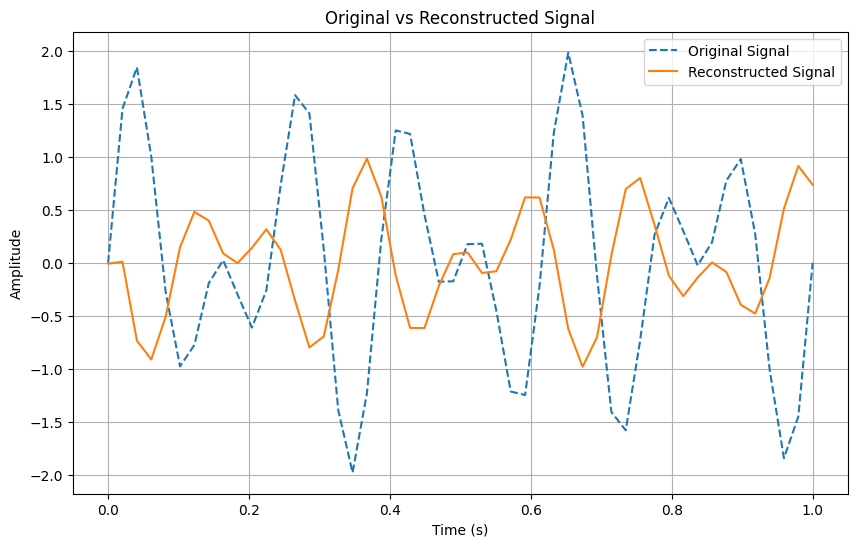

In [10]:
def f_original(t):
    return np.sin(10 * np.pi * t) + np.sin(16 * np.pi * t)

# Sample the original function
T = 1  # Period of the function
v_s = 50  # Sampling rate
t, x = sample(f_original, T, v_s)

a_values, b_values = dft(x) # Compute the DFT of the sampled signal
x_reconstructed = idft(a_values, b_values, len(x)) # reconstruction with idft

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Original Signal', linestyle='--')
plt.plot(t, x_reconstructed, label='Reconstructed Signal', linestyle='-')
plt.title('Original vs Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



* One of the use cases for Fourier analysis is denoising noisy signals. Consider the underlying signal: f(t) = sin(100πt) + sin(240πt)

* Add noise to the signal sampled from the normal distribution with a standard deviation of 2. This is the noisy signal.

* Sample the signal at 1000Hz from t=0 to t=0.25 (inclusive)

Plot the underlying and noisy signal against time on the same plot. Use different colours for the two signals

Use dft to obtain the Fourier coefficients for the noisy signal. Plot the magnitude spectrum obtained
Use idft to reconstruct the noisy signal. Plot the original noisy signal and reconstructed noisy signal on the same plot.

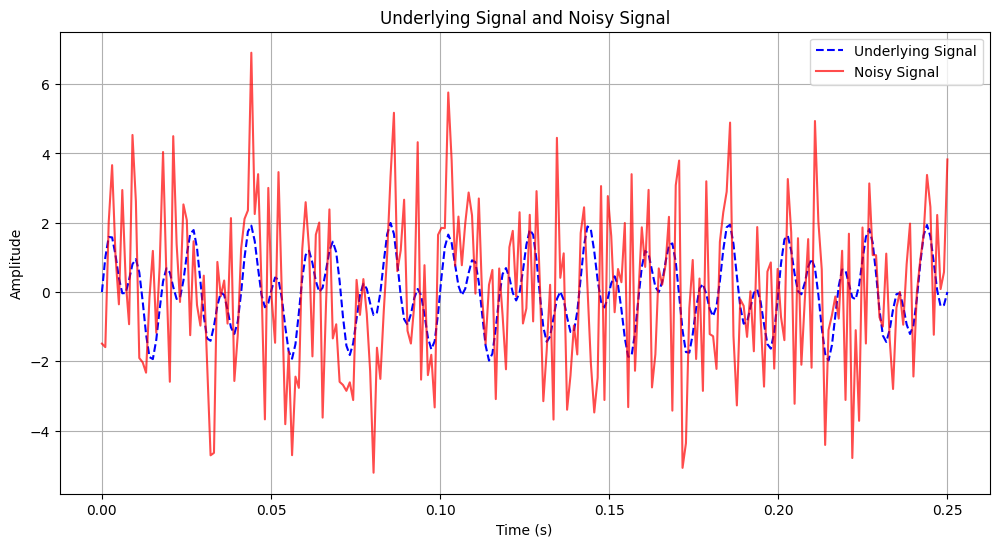

<ipython-input-7-eb3f88fc598c>:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequency_values, magnitude_spectrum, basefmt=" ", use_line_collection=True)


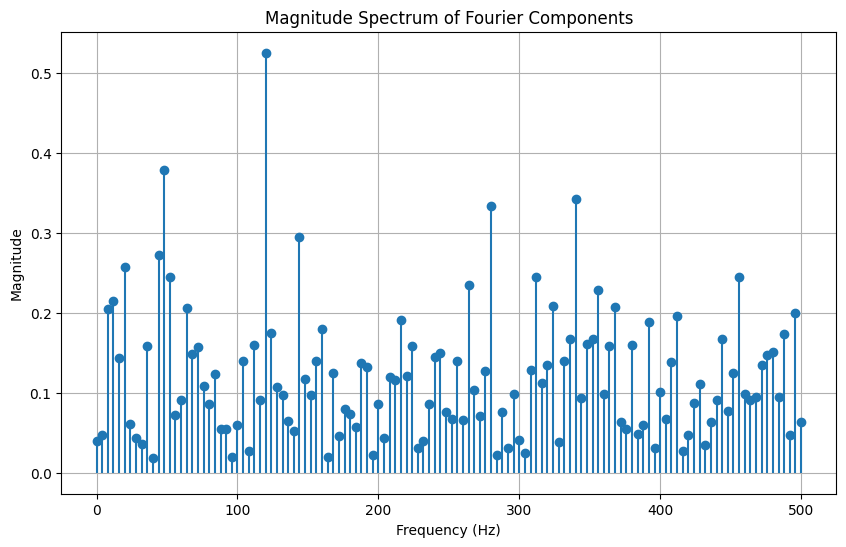

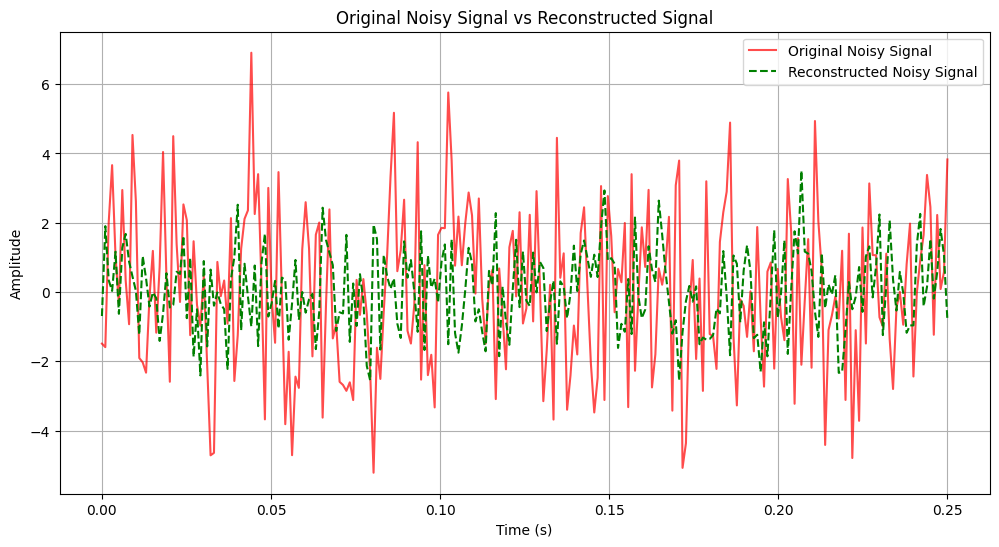

In [11]:
def f_underlying(t):
    return np.sin(100 * np.pi * t) + np.sin(240 * np.pi * t)

# Parameters
sampling_rate = 1000  #Hz
T = 0.25
n_samples = int(T * sampling_rate)
t = np.linspace(0, T, n_samples, endpoint=True)

underlying_signal = f_underlying(t)

# Add gaussian noise to the signal
noise = np.random.normal(0, 2, n_samples)
noisy_signal = underlying_signal + noise

# Plot signals against time
plt.figure(figsize=(12, 6))
plt.plot(t, underlying_signal, label='Underlying Signal', linestyle='--', color='blue')
plt.plot(t, noisy_signal, label='Noisy Signal', linestyle='-', color='red', alpha=0.7)
plt.title('Underlying Signal and Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

a_values_noisy, b_values_noisy = dft(noisy_signal) # DFT for noisy signal
plot_magnitude_spectrum(a_values_noisy, b_values_noisy, sampling_rate) # Plot mag
reconstructed_noisy_signal = idft(a_values_noisy, b_values_noisy, len(noisy_signal)) # Again reconsstruction with IDFT

# Plot the original noisy signal and the reconstructed signal
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Original Noisy Signal', linestyle='-', color='red', alpha=0.7)
plt.plot(t, reconstructed_noisy_signal, label='Reconstructed Noisy Signal', linestyle='--', color='green')
plt.title('Original Noisy Signal vs Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Perform filtering on the power spectral density of the decomposed noisy signal such that only the two highest frequencies are preserved. In other words, set all other frequencies to zero
Plot the magnitude spectrum of the noisy and filtered signal on the same plot
Reconstruct the filtered signal using idft and plot the filtered signal and underlying signal on the same plot.


<ipython-input-12-8ea8a78a7a05>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(magnitude_spectrum_noisy)) * sampling_rate / len(noisy_signal),
<ipython-input-12-8ea8a78a7a05>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(magnitude_spectrum_noisy)) * sampling_rate / len(noisy_signal),


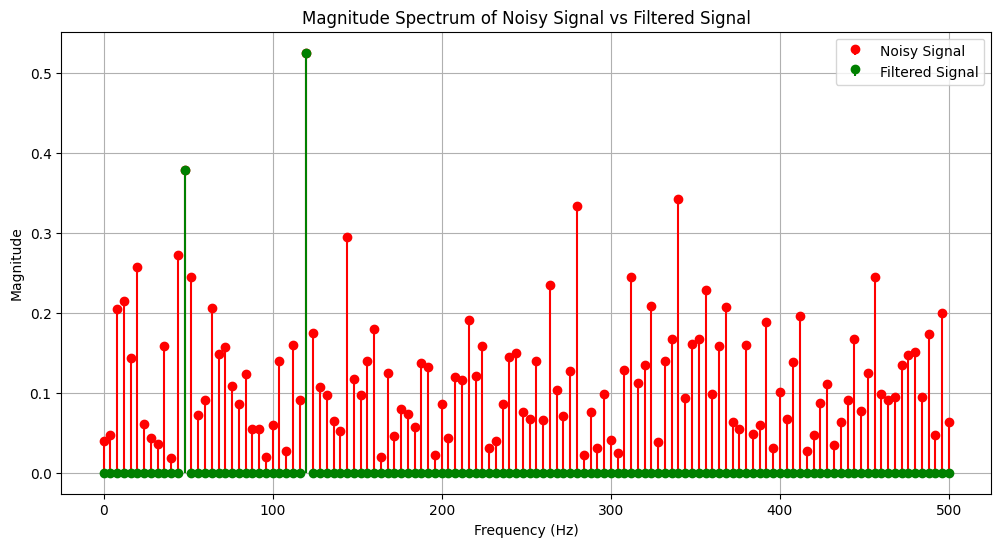

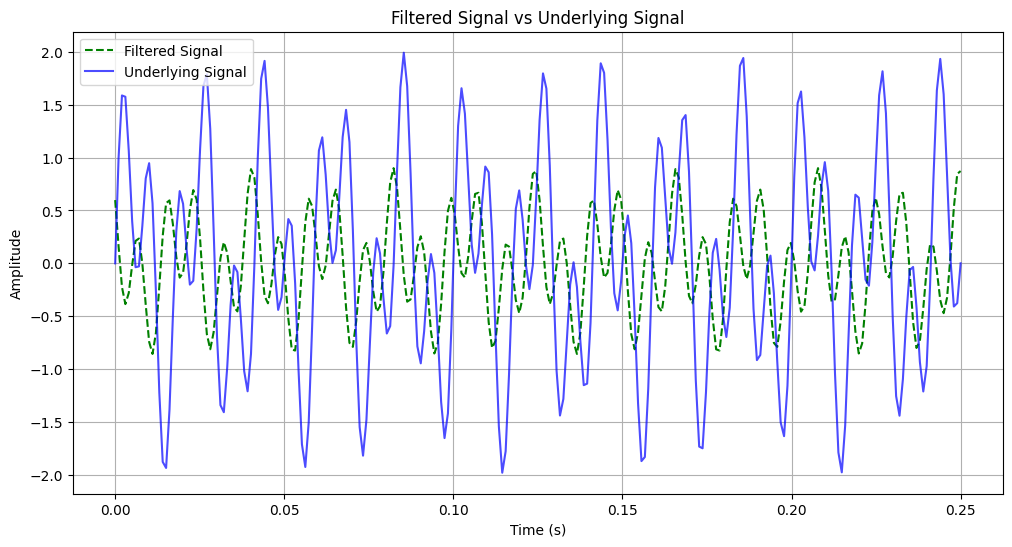

In [12]:
magnitude_spectrum_noisy = np.sqrt(np.array(a_values_noisy[:len(b_values_noisy)])**2 + np.array(b_values_noisy)**2)
top_two_indices = np.argsort(magnitude_spectrum_noisy)[-2:]  # Get indices of the two highest peaks
a_values_filtered = np.zeros_like(a_values_noisy)
b_values_filtered = np.zeros_like(b_values_noisy)

# To keep only the two highest frequencies in the filtered coefficients
for idx in top_two_indices:
    a_values_filtered[idx] = a_values_noisy[idx]
    if idx < len(b_values_filtered):
        b_values_filtered[idx] = b_values_noisy[idx]

# Plot the magnitude spectrum of the signals on the same plot
plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(magnitude_spectrum_noisy)) * sampling_rate / len(noisy_signal),
         magnitude_spectrum_noisy, basefmt=" ", use_line_collection=True, label='Noisy Signal', linefmt='r-')
plt.stem(np.arange(len(magnitude_spectrum_noisy)) * sampling_rate / len(noisy_signal),
         np.sqrt(np.array(a_values_filtered[:len(b_values_filtered)])**2 + np.array(b_values_filtered)**2),
         basefmt=" ", use_line_collection=True, label='Filtered Signal', linefmt='g-')
plt.title('Magnitude Spectrum of Noisy Signal vs Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


filtered_signal = idft(a_values_filtered, b_values_filtered, len(noisy_signal))

# Plot the signals on the same plot
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_signal, label='Filtered Signal', linestyle='--', color='green')
plt.plot(t, underlying_signal, label='Underlying Signal', linestyle='-', color='blue', alpha=0.7)
plt.title('Filtered Signal vs Underlying Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


Record a short audio clip in a noisy environment (ex. windy or crowded). You could say “I’m glad I made it through these assignments”
Save your audio clip as my_voice.wav or another compatible format
Load the audio clip into Python. You could use the soundfile library by installing:
pip install soundfile
conda install conda-forge::pysoundfile
Use the functions you made previously and frequency domain filtering to filter out the background noise in the audio. Reconstruct the denoised audio file and save as my_voice_reconstructed.wav
Write a short description of the processing you did. You will be graded on effort and quality of the denoising performed. Be creative!
Hint: the code on the next slide may be useful for manipulating the audio


Sample Rate (Hz) :  48000
Audio data shape :  (228352,)


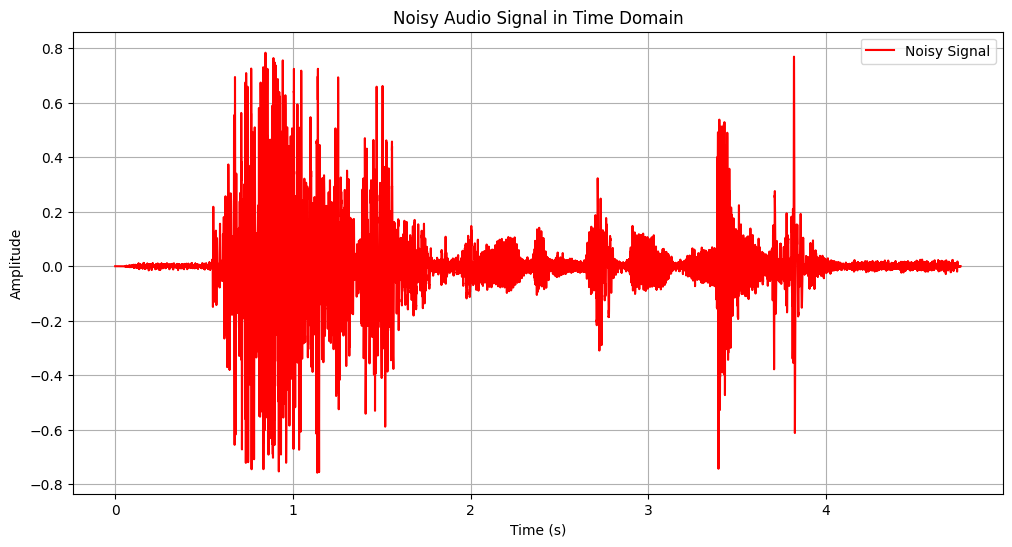

KeyboardInterrupt: 

In [14]:
# Load the audio file
y, v_s = sf.read('my_voice.wav')
print("Sample Rate (Hz) : ", v_s)
print("Audio data shape : ", y.shape)

# Plot the raw audio signal
t = np.arange(0, len(y)) / v_s
plt.figure(figsize=(12, 6))
plt.plot(t, y, color='red', label='Noisy Signal')
plt.title('Noisy Audio Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

N = len(y)
a_values_noisy = np.zeros(N // 2 + 1)
b_values_noisy = np.zeros(N // 2)

# Compute a_0
a_values_noisy[0] = 2 / N * np.sum(y)

# Compute a_k and b_k for k till N/2
for k in range(1, N // 2 + 1):
    a_values_noisy[k] = 2 / N * np.sum(y * np.cos(2 * np.pi * k * np.arange(N) / N))
    if k < N // 2:
        b_values_noisy[k - 1] = 2 / N * np.sum(y * np.sin(2 * np.pi * k * np.arange(N) / N))

magnitude_spectrum_noisy = np.sqrt(np.array(a_values_noisy[:len(b_values_noisy)])**2 + np.array(b_values_noisy)**2)

# Identifying the indices of the two highest peaks in the magnitude spectrum
top_two_indices = np.argsort(magnitude_spectrum_noisy)[-2:]
a_values_filtered = np.zeros_like(a_values_noisy)
b_values_filtered = np.zeros_like(b_values_noisy)

# Again to keep the two highest freq
for idx in top_two_indices:
    a_values_filtered[idx] = a_values_noisy[idx]
    if idx < len(b_values_filtered):
        b_values_filtered[idx] = b_values_noisy[idx]

# Plot the magnitude spectrum signlas
plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(magnitude_spectrum_noisy)) * v_s / len(y),
         magnitude_spectrum_noisy, basefmt=" ", use_line_collection=True, label='Noisy Signal', linefmt='r-')
plt.stem(np.arange(len(magnitude_spectrum_noisy)) * v_s / len(y),
         np.sqrt(np.array(a_values_filtered[:len(b_values_filtered)])**2 + np.array(b_values_filtered)**2),
         basefmt=" ", use_line_collection=True, label='Filtered Signal', linefmt='g-')
plt.title('Magnitude Spectrum of Noisy Signal vs Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Reconstruct the filtered signal using IDFT
y_reconstructed = []
for n in range(N):
    sum_cos = np.sum(a_values_filtered * np.cos(2 * np.pi * n * np.arange(len(a_values_filtered)) / N))
    sum_sin = np.sum(b_values_filtered * np.sin(2 * np.pi * n * np.arange(len(b_values_filtered)) / N))
    y_reconstructed.append(sum_cos + sum_sin)
y_reconstructed = np.array(y_reconstructed)

# Save the denoised audio file
sf.write('my_voice_reconstructed.wav', y_reconstructed, v_s)

# Plot the signals
plt.figure(figsize=(12, 6))
plt.plot(t, y_reconstructed, label='Filtered Signal', linestyle='--', color='green')
plt.plot(t, y, label='Original Noisy Signal', linestyle='-', color='red', alpha=0.7)
plt.title('Filtered Signal vs Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
